In [3125]:
# !pip install vaex

In [3126]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [3127]:

# Загрузка данных из таблиц

data = pd.read_excel('РЖД train/Привязка ID.xlsx')
data1 = pd.read_excel('РЖД train/Выгрузки_интересы+обращения+объёмы перевозок/Объёмы перевозок.xls')
data2 = pd.read_excel('РЖД train/Выгрузки_интересы+обращения+объёмы перевозок/Обращения.xls')
data3 = pd.read_excel('РЖД train/Выгрузки_интересы+обращения+объёмы перевозок/Интересы.xls')
data4 = pd.read_excel('РЖД train/Выгрузка_маркетинговые списки/МС_Владимирская область.xls')
data5 = pd.read_excel('РЖД train/Выгрузка_маркетинговые списки/МС_Республика Удмуртия.xls')
data6 = pd.read_excel('РЖД train/Выгрузка_маркетинговые списки/МС_Республика Татарстан.xls')
data7 = pd.read_excel('РЖД train/Выгрузка_маркетинговые списки/МС_Республика Мордовия.xls')
data8 = pd.read_excel('РЖД train/Выгрузка_маркетинговые списки/МС_Республика Марий Эл.xls')
data9 = pd.read_excel('РЖД train/Выгрузка_маркетинговые списки/МС_Нижегородская область.xls')
data10 = pd.read_excel('РЖД train/Выгрузка_маркетинговые списки/МС_Кировская область.xls')
data11 = pd.read_excel('РЖД train/Выгрузка_маркетинговые списки/МС_Владимирская область.xls')


# Исследование данных

In [3128]:

data5


,ID,Находится в реестре МСП,Размер компании.Наименование,Размер уставного капитала объявленный,ОКВЭД2.Наименование,ОКВЭД2.Код,Численность персонала по данным ФНС.Количество,Город фактический,Город юридический,ЕЛС действующий,Грузоотправитель,Грузополучатель,Карточка клиента (внешний источник).Индекс платежной дисциплины Описание,Карточка клиента (внешний источник).Индекс платежной дисциплины Значение,Карточка клиента (внешний источник).Индекс финансового риска Описание,Карточка клиента (внешний источник).Индекс финансового риска Значение,Госконтракты.Контракт,Госконтракты.Тип контракта
0,8697,Нет,NaN,NaN,NaN,NaN,NaN,Воткинск,Ижевск,NaN,Нет,Нет,NaN,NaN,NaN,NaN,NaN,NaN
1,8698,Нет,NaN,NaN,NaN,NaN,NaN,Ижевск,Ижевск,NaN,Нет,Нет,NaN,NaN,NaN,NaN,NaN,NaN
2,8699,Нет,NaN,NaN,NaN,NaN,NaN,Ижевск,Ижевск,,Нет,Нет,NaN,NaN,NaN,NaN,NaN,NaN
3,8700,Нет,NaN,NaN,NaN,NaN,NaN,Завьялово,Завьялово,NaN,Нет,Нет,NaN,NaN,NaN,NaN,NaN,NaN
4,8701,Нет,NaN,NaN,NaN,NaN,NaN,Камбарка,Камбарка,NaN,Нет,Нет,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35361,63,Нет,NaN,NaN,NaN,NaN,NaN,ЯР,NaN,NaN,Нет,Нет,NaN,NaN,NaN,NaN,NaN,NaN
35362,0,Нет,NaN,NaN,NaN,NaN,NaN,Яр,п.Яр,,Нет,Нет,NaN,NaN,NaN,NaN,NaN,NaN
35363,10562,Да,Средний бизнес,NaN,Торговля розничная прочая в неспециализированн...,47.19,NaN,Яр,пос. Яр,NaN,Нет,Нет,NaN,NaN,Недостаточно данных для расчета индекса финанс...,NaN,NaN,NaN
35364,10563,Нет,NaN,NaN,NaN,NaN,NaN,г САРАПУЛ,NaN,NaN,Нет,Нет,NaN,NaN,NaN,NaN,NaN,NaN


In [3129]:

# Количество уникальных ID
print('только', data5.ID.nunique(), 'из', data5.shape[0], 'являются уникальными')


только 1873 из 35366 являются уникальными


In [3130]:

# Существующий столбец ID не является уникальным
data5[data5.ID == 0]


,ID,Находится в реестре МСП,Размер компании.Наименование,Размер уставного капитала объявленный,ОКВЭД2.Наименование,ОКВЭД2.Код,Численность персонала по данным ФНС.Количество,Город фактический,Город юридический,ЕЛС действующий,Грузоотправитель,Грузополучатель,Карточка клиента (внешний источник).Индекс платежной дисциплины Описание,Карточка клиента (внешний источник).Индекс платежной дисциплины Значение,Карточка клиента (внешний источник).Индекс финансового риска Описание,Карточка клиента (внешний источник).Индекс финансового риска Значение,Госконтракты.Контракт,Госконтракты.Тип контракта
14929,0,Нет,Малый бизнес,NaN,NaN,NaN,NaN,Малая Пурга,Малая Пурга,NaN,Нет,Нет,NaN,NaN,NaN,NaN,NaN,NaN
14940,0,Нет,NaN,NaN,NaN,NaN,NaN,САРАПУЛ,Кез,NaN,Нет,Нет,NaN,NaN,NaN,NaN,NaN,NaN
19670,0,Нет,NaN,NaN,NaN,NaN,NaN,Ижевск,Ижевск,NaN,Нет,Нет,NaN,NaN,NaN,NaN,NaN,NaN
22876,0,Нет,NaN,NaN,NaN,NaN,NaN,Кез,Ижевск,NaN,Нет,Нет,NaN,NaN,NaN,NaN,NaN,NaN
23999,0,Нет,NaN,NaN,NaN,NaN,NaN,Ижевск,Ижевск,NaN,Нет,Нет,NaN,NaN,NaN,NaN,NaN,NaN
24721,0,Нет,NaN,NaN,NaN,NaN,NaN,Можга,Можга,NaN,Нет,Нет,NaN,NaN,NaN,NaN,NaN,NaN
30478,0,Нет,NaN,NaN,NaN,NaN,NaN,Ижевск,Ижевск,NaN,Нет,Нет,NaN,NaN,NaN,NaN,NaN,NaN
30496,0,Нет,NaN,NaN,NaN,NaN,NaN,Ижевск,Ижевск,NaN,Нет,Нет,NaN,NaN,NaN,NaN,NaN,NaN
35362,0,Нет,NaN,NaN,NaN,NaN,NaN,Яр,п.Яр,,Нет,Нет,NaN,NaN,NaN,NaN,NaN,NaN


In [3131]:

for n, df in enumerate([data4, data5, data6, data7, data8, data9, data10, data11], 4):
    print('\n\nДатасет', n)
    for i in data4.columns[1:]:
        print(f'Кол-во значений NaN по признаку "{i}" в датасете:', df[ i ].isna().sum(), 'из', df.shape[0])




Датасет 4
Кол-во значений NaN по признаку "Находится в реестре МСП" в датасете: 0 из 15697
Кол-во значений NaN по признаку "Размер компании.Наименование" в датасете: 563 из 15697
Кол-во значений NaN по признаку "Размер уставного капитала объявленный" в датасете: 2845 из 15697
Кол-во значений NaN по признаку "ОКВЭД2.Наименование" в датасете: 1469 из 15697
Кол-во значений NaN по признаку "ОКВЭД2.Код" в датасете: 1469 из 15697
Кол-во значений NaN по признаку "Численность персонала по данным ФНС.Количество" в датасете: 6157 из 15697
Кол-во значений NaN по признаку "Город фактический" в датасете: 14 из 15697
Кол-во значений NaN по признаку "Город юридический" в датасете: 67 из 15697
Кол-во значений NaN по признаку "ЕЛС действующий" в датасете: 2318 из 15697
Кол-во значений NaN по признаку "Грузоотправитель" в датасете: 0 из 15697
Кол-во значений NaN по признаку "Грузополучатель" в датасете: 0 из 15697
Кол-во значений NaN по признаку "Карточка клиента (внешний источник).Индекс платежной ди

In [3132]:
# Объединение всех записей в один датасет
market_lists_data = pd.concat(
    [data4, data5, data6, data7, data8, data9, data10, data11], axis=0
)


In [3133]:

# Проверка пустых значений в объединенном датасете
for i in market_lists_data.columns[1:]:
    print(f'Кол-во значений NaN по признаку "{i}" в объединенном датасете:', market_lists_data[ i ].isna().sum(), 'из', market_lists_data.shape[0])


Кол-во значений NaN по признаку "Находится в реестре МСП" в объединенном датасете: 0 из 275114
Кол-во значений NaN по признаку "Размер компании.Наименование" в объединенном датасете: 8049 из 275114
Кол-во значений NaN по признаку "Размер уставного капитала объявленный" в объединенном датасете: 44561 из 275114
Кол-во значений NaN по признаку "ОКВЭД2.Наименование" в объединенном датасете: 19400 из 275114
Кол-во значений NaN по признаку "ОКВЭД2.Код" в объединенном датасете: 19400 из 275114
Кол-во значений NaN по признаку "Численность персонала по данным ФНС.Количество" в объединенном датасете: 62144 из 275114
Кол-во значений NaN по признаку "Город фактический" в объединенном датасете: 54 из 275114
Кол-во значений NaN по признаку "Город юридический" в объединенном датасете: 819 из 275114
Кол-во значений NaN по признаку "ЕЛС действующий" в объединенном датасете: 53937 из 275114
Кол-во значений NaN по признаку "Грузоотправитель" в объединенном датасете: 0 из 275114
Кол-во значений NaN по при

In [3134]:

market_lists_data['Город фактический'].value_counts()


Город фактический
Нижний Новгород    25217
Киров              24992
Казань             21897
Ижевск             18512
Саранск            12454
                   ...  
Учка                   1
Лупья                  1
Зимино                 1
Шихово                 1
Бобино                 1
Name: count, Length: 2032, dtype: int64

In [3135]:

# TODO Исправить неправильные названия городов
market_lists_data['Город фактический']


0                       Александров
1        Бараки,  Судогодского р-на
2                        Кольчугино
3                          Радужный
4                        г.Владимир
                    ...            
15692                      Владимир
15693                      Владимир
15694                      Владимир
15695                Юрьев-Польский
15696              Юрьев - Польский
Name: Город фактический, Length: 275114, dtype: object

In [3136]:

market_lists_data['Находится в реестре МСП'].value_counts()


Находится в реестре МСП
Нет    180131
Да      94983
Name: count, dtype: int64

<Axes: title={'center': 'Находится в реестре МСП'}>

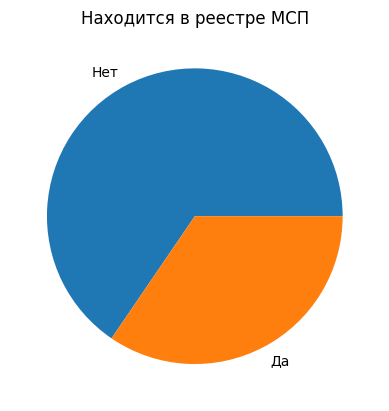

In [3137]:

market_lists_data['Находится в реестре МСП'].value_counts().plot(kind='pie', title='Находится в реестре МСП', ylabel='')


<Axes: title={'center': 'Размер компании.Наименование'}>

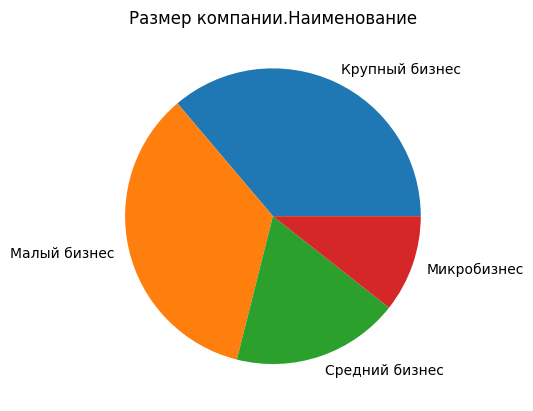

In [3138]:

market_lists_data['Размер компании.Наименование'].value_counts().plot(kind='pie', ylabel='', title='Размер компании.Наименование')


In [3139]:

a = market_lists_data['Размер уставного капитала объявленный'][ ~market_lists_data['Размер уставного капитала объявленный'].isna() ]
a


14           2490.0
15           2490.0
16           2490.0
17           2490.0
66          48338.0
            ...    
14770    82003467.0
14771    82003467.0
14772    82003467.0
14773    82003467.0
14774    82003467.0
Name: Размер уставного капитала объявленный, Length: 230553, dtype: float64

In [3140]:

# Интересы
# TODO Удалить столбцы Дата, Ссылка
data3


,Дата,Тема,Сценарий,Состояние,ID,Подразделение,Ожидаемая выручка,"Вероятность сделки, %",Дата следующей активности,Следующая активность,Канал первичного интереса,Номер,Ссылка (служебное поле для вывода на экран прочих реквизитов объекта)
0,01.02.2023 07:26,Привлечение потенциального клиента.,1.Продажа ЦФТО,Завершен неудачно,17369,ЦПУ МУРАШИ,NaN,NaN,NaN,NaN,10. Холодный звонок,0001-022043,"Интерес ""Привлечение потенциального клиента."" ..."
1,01.02.2023 07:31,Привлечение клиента,1.Продажа ЦФТО,Завершен неудачно,13714,ЦПУ МУРАШИ,NaN,NaN,NaN,NaN,10. Холодный звонок,0001-022053,"Интерес ""Привлечение клиента"" от 01.02.2023"
2,01.02.2023 07:45,Привлечение потенциального клиента ст. Подосин...,1.Продажа ЦФТО,Завершен неудачно,14984,ЦПУ МУРАШИ,NaN,NaN,NaN,NaN,10. Холодный звонок,0001-022069,"Интерес ""Привлечение потенциального клиента ст..."
3,01.02.2023 08:22,"Перевозка с Владимира - МСК, Ярославль",1.Продажа ЦФТО,Завершен неудачно,14916,ЦПУ ВЛАДИМИР,NaN,NaN,NaN,NaN,Обращение,0001-022106,"Интерес ""Перевозка с Владимира - МСК, Ярославл..."
4,01.02.2023 08:37,Привлечение потенциальных клиентов,1.Продажа ЦФТО,Завершен неудачно,14257,ЦПУ ШАХУНЬЯ,NaN,NaN,13.03.2023 14:30:00,звонок,10. Холодный звонок,0001-022115,"Интерес ""Привлечение потенциальных клиентов"" о..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19176,31.10.2023 17:02,Привлечение потенциального клиента,1.Продажа ЦФТО,Завершен неудачно,2780,ЦПУ КИРОВ,NaN,NaN,NaN,NaN,10. Холодный звонок,0001-295610,"Интерес ""Привлечение потенциального клиента"" о..."
19177,31.10.2023 17:03,пересмотр логистики предприятия,1.Продажа ЦФТО,Завершен неудачно,13358,ЦПУ КАЗАНЬ,NaN,NaN,NaN,NaN,10. Холодный звонок,0001-295612,"Интерес ""пересмотр логистики предприятия"" от 3..."
19178,31.10.2023 17:08,пересмотр логистики предприятия,1.Продажа ЦФТО,Завершен неудачно,13359,ЦПУ КАЗАНЬ,NaN,NaN,NaN,NaN,10. Холодный звонок,0001-295618,"Интерес ""пересмотр логистики предприятия"" от 3..."
19179,31.10.2023 17:11,организация ж.д.перевозки,1.Продажа ЦФТО,Завершен неудачно,13360,ЦПУ КАЗАНЬ,NaN,NaN,NaN,NaN,10. Холодный звонок,0001-295625,"Интерес ""организация ж.д.перевозки"" от 31.10.2023"


In [3141]:

# Обращения
# TODO Удалить столбцы Дата, Тип обращения, Номер
data2


,Дата,Тема,ID,Тип обращения,Номер,Тема вопроса,Группа вопросов,Количество доработок
0,01.02.2022 15:52,Заключение договоров: Другое,21082,Обращение,0000-009659,Заключение договоров,Другое,NaN
1,01.02.2024 10:04,Оформление документов связанных с перевозкой г...,1923,Обращение,0001-025297,Оформление документов связанных с перевозкой г...,Заявка ГУ-12,NaN
2,01.02.2024 11:25,Справочный запрос: Другое,11332,Обращение,0001-025498,Справочный запрос,Другое,NaN
3,01.02.2024 11:28,Справочный запрос: Другое,21155,Обращение,0001-025503,Справочный запрос,Другое,NaN
4,01.02.2024 11:30,Справочный запрос: Регистрация официальных обр...,21283,Обращение,0001-025506,Справочный запрос,Регистрация официальных обращений,NaN
...,...,...,...,...,...,...,...,...
2821,31.10.2023 15:52,Цифровые сервисы: Личный кабинет клиента,21157,Обращение,0001-295507,Цифровые сервисы,Личный кабинет клиента,NaN
2822,31.10.2023 17:13,Справочный запрос: Регистрация официальных обр...,16015,Обращение,0001-295628,Справочный запрос,Регистрация официальных обращений,NaN
2823,31.10.2023 17:39,Справочный запрос: Регистрация официальных обр...,4065,Обращение,0001-295645,Справочный запрос,Регистрация официальных обращений,NaN
2824,31.10.2023 17:40,Справочный запрос: Регистрация официальных обр...,4065,Обращение,0001-295647,Справочный запрос,Регистрация официальных обращений,NaN


In [3142]:
data2['Тип обращения'].value_counts()

Тип обращения
Обращение    2826
Name: count, dtype: int64

In [3143]:
data2['Тема вопроса'].value_counts()

Тема вопроса
Справочный запрос                                                          1423
Цифровые сервисы                                                            454
Электронный обмен документами                                               320
Перевозка грузов и порожних вагонов                                         213
Оформление документов связанных с перевозкой грузов                         125
Заключение договоров                                                        104
Дополнительные услуги                                                        76
Финансовые расчеты                                                           49
Жалобы                                                                       22
Перевозка грузов в контейнерах                                               21
Благодарности                                                                 9
Перевозка грузов в рефрижераторных секциях ИВ-термосах вагонах-термосах       7
Перевозка сборной/мелкой па

In [3144]:
data2['Группа вопросов'].value_counts()

Группа вопросов
Регистрация официальных обращений                                                                 1231
Личный кабинет клиента                                                                             449
Другое                                                                                             399
Услуги по сопровождению АС ЭТРАН                                                                   201
Расчет стоимости перевозки грузов и порожних вагонов                                               153
Акт общей формы                                                                                     45
Стоимость оказания услуги                                                                           32
Получение финансовых документов                                                                     24
Заявка ГУ-12                                                                                        23
Накладная                                                

In [3145]:
data[ data['ID']==912 ]

,ID,Источник
911,912,Маркетинговый список


In [3146]:
market_lists_data[ market_lists_data['ID']==912 ]

,ID,Находится в реестре МСП,Размер компании.Наименование,Размер уставного капитала объявленный,ОКВЭД2.Наименование,ОКВЭД2.Код,Численность персонала по данным ФНС.Количество,Город фактический,Город юридический,ЕЛС действующий,Грузоотправитель,Грузополучатель,Карточка клиента (внешний источник).Индекс платежной дисциплины Описание,Карточка клиента (внешний источник).Индекс платежной дисциплины Значение,Карточка клиента (внешний источник).Индекс финансового риска Описание,Карточка клиента (внешний источник).Индекс финансового риска Значение,Госконтракты.Контракт,Госконтракты.Тип контракта
5568,912,Нет,Крупный бизнес,250800.0,Производство сортового горячекатаного проката ...,24.10.6,2813.0,Омутнинск,г. Омутнинск,1000177188,Да,Да,Низкий риск просрочки платежа,98.0,Средний риск,35.0,Изготовление и поставка металлопродукции (дале...,Исполнитель
5569,912,Нет,Крупный бизнес,250800.0,Производство сортового горячекатаного проката ...,24.10.6,2813.0,Омутнинск,г. Омутнинск,1000177188,Да,Да,Низкий риск просрочки платежа,98.0,Средний риск,35.0,на оказание услуг по санаторно-курортному лече...,Исполнитель
5570,912,Нет,Крупный бизнес,250800.0,Производство сортового горячекатаного проката ...,24.10.6,2813.0,Омутнинск,г. Омутнинск,1000177188,Да,Да,Низкий риск просрочки платежа,98.0,Средний риск,35.0,оказание услуг по санаторно-курортному лечен...,Исполнитель
5571,912,Нет,Крупный бизнес,250800.0,Производство сортового горячекатаного проката ...,24.10.6,2813.0,Омутнинск,г. Омутнинск,1000177188,Да,Да,Низкий риск просрочки платежа,98.0,Средний риск,35.0,Оказание услуг по транспортировке сточных вод,Исполнитель
5572,912,Нет,Крупный бизнес,250800.0,Производство сортового горячекатаного проката ...,24.10.6,2813.0,Омутнинск,г. Омутнинск,1000177188,Да,Да,Низкий риск просрочки платежа,98.0,Средний риск,35.0,Поставка металлопродукции,Исполнитель
5573,912,Нет,Крупный бизнес,250800.0,Производство сортового горячекатаного проката ...,24.10.6,2813.0,Омутнинск,г. Омутнинск,1000177188,Да,Да,Низкий риск просрочки платежа,98.0,Средний риск,35.0,Поставка полосы ст. 35,Исполнитель
5574,912,Нет,Крупный бизнес,250800.0,Производство сортового горячекатаного проката ...,24.10.6,2813.0,Омутнинск,г. Омутнинск,1000177188,Да,Да,Низкий риск просрочки платежа,98.0,Средний риск,35.0,Поставка теплоэнергии,Исполнитель
5575,912,Нет,Крупный бизнес,250800.0,Производство сортового горячекатаного проката ...,24.10.6,2813.0,Омутнинск,г. Омутнинск,1000177188,Да,Да,Низкий риск просрочки платежа,98.0,Средний риск,35.0,Профили стальные,Исполнитель
5576,912,Нет,Крупный бизнес,250800.0,Производство сортового горячекатаного проката ...,24.10.6,2813.0,Омутнинск,г. Омутнинск,1000177188,Да,Да,Низкий риск просрочки платежа,98.0,Средний риск,35.0,Профили стальные (сталь марки Ст 20),Исполнитель
5577,912,Нет,Крупный бизнес,250800.0,Производство сортового горячекатаного проката ...,24.10.6,2813.0,Омутнинск,г. Омутнинск,1000177188,Да,Да,Низкий риск просрочки платежа,98.0,Средний риск,35.0,"Энергия тепловая, отпущенная тепловыми электро...",Исполнитель


In [3147]:

print(
    'ESL unique:', market_lists_data['ЕЛС действующий'].nunique(),
    '\nID unique:', market_lists_data['ID'].nunique()
)


ESL unique: 1358 
ID unique: 10565


In [3148]:

# Привязка ID
data


,ID,Источник
0,1,Маркетинговый список
1,2,Маркетинговый список
2,3,Маркетинговый список
3,4,Маркетинговый список
4,5,Маркетинговый список
...,...,...
21724,21725,Объёмы перевозок
21725,21726,Объёмы перевозок
21726,21727,Объёмы перевозок
21727,21728,Объёмы перевозок


In [3149]:

print(
'Все значения признака "ЕЛС действующий": ', market_lists_data['ЕЛС действующий'].shape[0],
'\nНепустые значения: ', market_lists_data['ЕЛС действующий'][ ~market_lists_data['ЕЛС действующий'].isna() ].shape[0]
)


Все значения признака "ЕЛС действующий":  275114 
Непустые значения:  221177


In [3150]:

# Данные не совпадают с описанием
market_lists_data['ЕЛС действующий'].value_counts()


ЕЛС действующий
              101347
1001781555      3542
1003157853      3388
1004333340      3066
1003881068      3045
               ...  
1002698247         1
7000091002         1
1001645368         1
1003422116         1
1006146458         1
Name: count, Length: 1358, dtype: int64

In [3151]:
data1

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Код валюты,рубли,рубли.1,рубли.2,рубли.3,рубли.4,...,рубли.54,рубли.55,рубли.56,рубли.57,рубли.58,рубли.59,рубли.60,рубли.61,рубли.62,рубли.63
0,NaN,NaN,NaN,NaN,Месяц,2022/08,2022/08,2023/10,2023/10,2024/01,...,2023/08,2023/08,2023/03,2023/03,2024/08,2024/08,2022/01,2022/01,2023/07,2023/07
1,ID,Субъект федерации отп,Субъект федерации наз,Код груза,Гр груза по опер.номен,Провозная плата,Объем перевозок(тн),Провозная плата,Объем перевозок(тн),Провозная плата,...,Провозная плата,Объем перевозок(тн),Провозная плата,Объем перевозок(тн),Провозная плата,Объем перевозок(тн),Провозная плата,Объем перевозок(тн),Провозная плата,Объем перевозок(тн)
2,21220,Рязанская область,Оренбургская область,39146,МЕТИЗЫ,0,0,0,0,140356,...,0,0,0,0,0,0,0,0,0,0
3,912,Кировская область,Саратовская область,32411,ЧЕРНЫЕ МЕТАЛЛЫ,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,912,Кировская область,Приморский край,32411,ЧЕРНЫЕ МЕТАЛЛЫ,675705,203,0,0,0,...,0,0,0,0,4668608,1155,1440050,476,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13422,11274,Республика Татарстан (Татарстан),Ростовская область,24116,ПРОМ.СЫРЬЕ И ФОРМ. МАТ-ЛЫ,0,0,0,0,0,...,0,0,0,0,81935,136,0,0,0,0
13423,20123,Удмуртская Республика,Оренбургская область,32411,ЧЕРНЫЕ МЕТАЛЛЫ,0,0,0,0,0,...,0,0,0,0,871122,397,0,0,0,0
13424,20123,Удмуртская Республика,Алтайский край,32411,ЧЕРНЫЕ МЕТАЛЛЫ,0,0,0,0,0,...,0,0,0,0,461477,135,0,0,0,0
13425,20123,Удмуртская Республика,Челябинская область,32411,ЧЕРНЫЕ МЕТАЛЛЫ,0,0,0,0,0,...,0,0,0,0,1342809,600,0,0,0,0


# Обработка данных, связанных с объемами перевозок

In [3152]:
#  Обработка данных об объемах перевозок

traffic_volumes_data = data1.drop([ column_name for column_name in data1.columns[5::2] ], axis=1)

a = list(traffic_volumes_data.columns)[5:]

for column in traffic_volumes_data.columns[5:]:
    traffic_volumes_data[ f'{traffic_volumes_data[column][0]}' ] = traffic_volumes_data[column][2:]
    del traffic_volumes_data[column]

for column in traffic_volumes_data.columns[:5]:
    traffic_volumes_data[ f'{traffic_volumes_data[column][1]}' ] = traffic_volumes_data[column][2:]
    del traffic_volumes_data[column]

traffic_volumes_data = traffic_volumes_data.drop([0, 1])


# traffic_volumes_data[f'{traffic_volumes_data['Unnamed: 0'][1]}']=traffic_volumes_data['Unnamed: 0'][2:]
# traffic_volumes_data[f'{traffic_volumes_data['Unnamed: 1'][1]}']=traffic_volumes_data['Unnamed: 1'][2:]
# traffic_volumes_data[f'{traffic_volumes_data['Unnamed: 2'][1]}']=traffic_volumes_data['Unnamed: 2'][2:]
# traffic_volumes_data[f'{traffic_volumes_data['Unnamed: 3'][1]}']=traffic_volumes_data['Unnamed: 3'][2:]
# traffic_volumes_data[f'{traffic_volumes_data['Код валюты'][1]}']=traffic_volumes_data['Код валюты'][2:]

traffic_volumes_data_x, traffic_volumes_data_y = traffic_volumes_data.drop('2024/08', axis=1), traffic_volumes_data.pop('2024/08')
traffic_volumes_data_x

,2022/08,2023/10,2024/01,2022/11,2022/10,2022/05,2022/06,2022/09,2022/12,2022/04,...,2022/07,2023/08,2023/03,2022/01,2023/07,ID,Субъект федерации отп,Субъект федерации наз,Код груза,Гр груза по опер.номен
2,0,0,36,0,0,0,0,18,36,0,...,0,0,0,0,0,21220,Рязанская область,Оренбургская область,39146,МЕТИЗЫ
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,912,Кировская область,Саратовская область,32411,ЧЕРНЫЕ МЕТАЛЛЫ
4,203,0,0,0,0,457,873,0,0,272,...,336,0,0,476,0,912,Кировская область,Приморский край,32411,ЧЕРНЫЕ МЕТАЛЛЫ
5,0,0,69,0,0,0,0,0,0,0,...,0,188,134,0,274,912,Кировская область,Удмуртская Республика,32411,ЧЕРНЫЕ МЕТАЛЛЫ
6,0,0,0,0,66,0,0,0,68,0,...,2554,62,343,0,0,912,Кировская область,Оренбургская область,32411,ЧЕРНЫЕ МЕТАЛЛЫ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13422,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,11274,Республика Татарстан (Татарстан),Ростовская область,24116,ПРОМ.СЫРЬЕ И ФОРМ. МАТ-ЛЫ
13423,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,20123,Удмуртская Республика,Оренбургская область,32411,ЧЕРНЫЕ МЕТАЛЛЫ
13424,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,20123,Удмуртская Республика,Алтайский край,32411,ЧЕРНЫЕ МЕТАЛЛЫ
13425,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,20123,Удмуртская Республика,Челябинская область,32411,ЧЕРНЫЕ МЕТАЛЛЫ


In [3153]:

# Попытка обработать data1

# data1 = data1[:10]

# # Обработка данных об объемах перевозок
# traffic_volumes_data = pd.DataFrame()
# traffic_volumes_data_pre = pd.DataFrame(index=[i for i in range(2, data1.shape[0])])
# # traffic_volumes_data['ID'] = data1['Unnamed: 0'][2:]


# for i in range(5):
#     traffic_volumes_data_pre[ data1[ data1.columns[i] ][1] ] = data1[ data1.columns[i] ][2:]

# traffic_volumes_data_pre.index[:-2]


# column, next_column = data1.columns[5], data1.columns[6]
# id = 4
# b = pd.Series(traffic_volumes_data.iloc[id])
# b['Месяц'] = data1[column][0]
# b['Провозная плата'] = data1[column][id]
# b['Объем перевозок(тн)'] = data1[next_column][id]
# b


# df_list = []
# for id in range(2, data1.shape[0]-2):
#     print(id)
#     for n_column in range(5, 68, 2):
#         column = data1.columns[n_column]
#         next_column = data1.columns[n_column+1]
#         new_row = traffic_volumes_data_pre.iloc[id].copy()
#         # print(traffic_volumes_data_pre.iloc[id-2])
#         # print(new_row)
#         new_row['Месяц'] = data1.iloc[0][column]
#         new_row['Провозная плата'] = data1.iloc[id][column]
#         new_row['Объем перевозок(тн)'] = data1.iloc[id][next_column]
#         # print(new_row)
#         df_list.append(new_row)

# traffic_volumes_data = pd.DataFrame(df_list, index=pd.RangeIndex(len(df_list)))
# traffic_volumes_data


In [3154]:

traffic_volumes_data[ traffic_volumes_data['ID']==912 ]


,2022/08,2023/10,2024/01,2022/11,2022/10,2022/05,2022/06,2022/09,2022/12,2022/04,...,2022/07,2023/08,2023/03,2022/01,2023/07,ID,Субъект федерации отп,Субъект федерации наз,Код груза,Гр груза по опер.номен
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,912,Кировская область,Саратовская область,32411,ЧЕРНЫЕ МЕТАЛЛЫ
4,203,0,0,0,0,457,873,0,0,272,...,336,0,0,476,0,912,Кировская область,Приморский край,32411,ЧЕРНЫЕ МЕТАЛЛЫ
5,0,0,69,0,0,0,0,0,0,0,...,0,188,134,0,274,912,Кировская область,Удмуртская Республика,32411,ЧЕРНЫЕ МЕТАЛЛЫ
6,0,0,0,0,66,0,0,0,68,0,...,2554,62,343,0,0,912,Кировская область,Оренбургская область,32411,ЧЕРНЫЕ МЕТАЛЛЫ
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,912,Кировская область,Оренбургская область,32102,ЧЕРНЫЕ МЕТАЛЛЫ
8,272,1018,1888,607,951,132,467,808,810,535,...,69,410,136,808,1022,912,Кировская область,Нижегородская область,32411,ЧЕРНЫЕ МЕТАЛЛЫ
9,729,470,274,321,394,193,329,334,200,198,...,463,1215,999,131,741,912,Кировская область,Город Москва столица Российской Федераци,32411,ЧЕРНЫЕ МЕТАЛЛЫ
10,0,202,67,0,0,2275,609,0,0,332,...,335,0,134,454,0,912,Кировская область,Московская область,32411,ЧЕРНЫЕ МЕТАЛЛЫ
11,810,1153,1215,546,327,674,206,1148,1541,1549,...,338,1092,2489,475,1291,912,Кировская область,Свердловская область,32411,ЧЕРНЫЕ МЕТАЛЛЫ
12,0,139,0,0,0,0,0,0,0,0,...,0,482,0,0,69,912,Кировская область,Свердловская область,34108,ПРОМ.СЫРЬЕ И ФОРМ. МАТ-ЛЫ


# Объединение датасетов, содержащих разные признаки

In [3155]:

# Просмотр данных для отбора признаков
market_lists_data[ market_lists_data['ID']==912 ]


,ID,Находится в реестре МСП,Размер компании.Наименование,Размер уставного капитала объявленный,ОКВЭД2.Наименование,ОКВЭД2.Код,Численность персонала по данным ФНС.Количество,Город фактический,Город юридический,ЕЛС действующий,Грузоотправитель,Грузополучатель,Карточка клиента (внешний источник).Индекс платежной дисциплины Описание,Карточка клиента (внешний источник).Индекс платежной дисциплины Значение,Карточка клиента (внешний источник).Индекс финансового риска Описание,Карточка клиента (внешний источник).Индекс финансового риска Значение,Госконтракты.Контракт,Госконтракты.Тип контракта
5568,912,Нет,Крупный бизнес,250800.0,Производство сортового горячекатаного проката ...,24.10.6,2813.0,Омутнинск,г. Омутнинск,1000177188,Да,Да,Низкий риск просрочки платежа,98.0,Средний риск,35.0,Изготовление и поставка металлопродукции (дале...,Исполнитель
5569,912,Нет,Крупный бизнес,250800.0,Производство сортового горячекатаного проката ...,24.10.6,2813.0,Омутнинск,г. Омутнинск,1000177188,Да,Да,Низкий риск просрочки платежа,98.0,Средний риск,35.0,на оказание услуг по санаторно-курортному лече...,Исполнитель
5570,912,Нет,Крупный бизнес,250800.0,Производство сортового горячекатаного проката ...,24.10.6,2813.0,Омутнинск,г. Омутнинск,1000177188,Да,Да,Низкий риск просрочки платежа,98.0,Средний риск,35.0,оказание услуг по санаторно-курортному лечен...,Исполнитель
5571,912,Нет,Крупный бизнес,250800.0,Производство сортового горячекатаного проката ...,24.10.6,2813.0,Омутнинск,г. Омутнинск,1000177188,Да,Да,Низкий риск просрочки платежа,98.0,Средний риск,35.0,Оказание услуг по транспортировке сточных вод,Исполнитель
5572,912,Нет,Крупный бизнес,250800.0,Производство сортового горячекатаного проката ...,24.10.6,2813.0,Омутнинск,г. Омутнинск,1000177188,Да,Да,Низкий риск просрочки платежа,98.0,Средний риск,35.0,Поставка металлопродукции,Исполнитель
5573,912,Нет,Крупный бизнес,250800.0,Производство сортового горячекатаного проката ...,24.10.6,2813.0,Омутнинск,г. Омутнинск,1000177188,Да,Да,Низкий риск просрочки платежа,98.0,Средний риск,35.0,Поставка полосы ст. 35,Исполнитель
5574,912,Нет,Крупный бизнес,250800.0,Производство сортового горячекатаного проката ...,24.10.6,2813.0,Омутнинск,г. Омутнинск,1000177188,Да,Да,Низкий риск просрочки платежа,98.0,Средний риск,35.0,Поставка теплоэнергии,Исполнитель
5575,912,Нет,Крупный бизнес,250800.0,Производство сортового горячекатаного проката ...,24.10.6,2813.0,Омутнинск,г. Омутнинск,1000177188,Да,Да,Низкий риск просрочки платежа,98.0,Средний риск,35.0,Профили стальные,Исполнитель
5576,912,Нет,Крупный бизнес,250800.0,Производство сортового горячекатаного проката ...,24.10.6,2813.0,Омутнинск,г. Омутнинск,1000177188,Да,Да,Низкий риск просрочки платежа,98.0,Средний риск,35.0,Профили стальные (сталь марки Ст 20),Исполнитель
5577,912,Нет,Крупный бизнес,250800.0,Производство сортового горячекатаного проката ...,24.10.6,2813.0,Омутнинск,г. Омутнинск,1000177188,Да,Да,Низкий риск просрочки платежа,98.0,Средний риск,35.0,"Энергия тепловая, отпущенная тепловыми электро...",Исполнитель


In [3156]:

# Удаление ненужных признаков
market_lists_data = market_lists_data.drop(['ОКВЭД2.Наименование', 'ОКВЭД2.Код', 'Город юридический', 'ЕЛС действующий', 'Госконтракты.Контракт', 'Карточка клиента (внешний источник).Индекс платежной дисциплины Описание', 'Карточка клиента (внешний источник).Индекс финансового риска Описание'], axis=1)
market_lists_data[ market_lists_data['ID']==912 ]

,ID,Находится в реестре МСП,Размер компании.Наименование,Размер уставного капитала объявленный,Численность персонала по данным ФНС.Количество,Город фактический,Грузоотправитель,Грузополучатель,Карточка клиента (внешний источник).Индекс платежной дисциплины Значение,Карточка клиента (внешний источник).Индекс финансового риска Значение,Госконтракты.Тип контракта
5568,912,Нет,Крупный бизнес,250800.0,2813.0,Омутнинск,Да,Да,98.0,35.0,Исполнитель
5569,912,Нет,Крупный бизнес,250800.0,2813.0,Омутнинск,Да,Да,98.0,35.0,Исполнитель
5570,912,Нет,Крупный бизнес,250800.0,2813.0,Омутнинск,Да,Да,98.0,35.0,Исполнитель
5571,912,Нет,Крупный бизнес,250800.0,2813.0,Омутнинск,Да,Да,98.0,35.0,Исполнитель
5572,912,Нет,Крупный бизнес,250800.0,2813.0,Омутнинск,Да,Да,98.0,35.0,Исполнитель
5573,912,Нет,Крупный бизнес,250800.0,2813.0,Омутнинск,Да,Да,98.0,35.0,Исполнитель
5574,912,Нет,Крупный бизнес,250800.0,2813.0,Омутнинск,Да,Да,98.0,35.0,Исполнитель
5575,912,Нет,Крупный бизнес,250800.0,2813.0,Омутнинск,Да,Да,98.0,35.0,Исполнитель
5576,912,Нет,Крупный бизнес,250800.0,2813.0,Омутнинск,Да,Да,98.0,35.0,Исполнитель
5577,912,Нет,Крупный бизнес,250800.0,2813.0,Омутнинск,Да,Да,98.0,35.0,Исполнитель


In [3157]:

# Кодирование признака
market_lists_data['Находится в реестре МСП'].value_counts()
market_lists_data['Находится в реестре МСП'][ market_lists_data['Находится в реестре МСП']=='Да' ] = 1
market_lists_data['Находится в реестре МСП'][ market_lists_data['Находится в реестре МСП']=='Нет' ] = 0

market_lists_data['Находится в реестре МСП'].value_counts()

/tmp/ipykernel_715972/3476278788.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  market_lists_data['Находится в реестре МСП'][ market_lists_data['Находится в реестре МСП']=='Да' ] = 1
/tmp/ipykernel_715972/3476278788.py:3: SettingWithCop

Находится в реестре МСП
0    180131
1     94983
Name: count, dtype: int64

In [3158]:

# Кодирование признака
market_lists_data['Грузоотправитель'].value_counts()
market_lists_data['Грузоотправитель'][ market_lists_data['Грузоотправитель']=='Да' ] = 1
market_lists_data['Грузоотправитель'][ market_lists_data['Грузоотправитель']=='Нет' ] = 0

market_lists_data['Грузоотправитель'].value_counts()

/tmp/ipykernel_715972/3168211894.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  market_lists_data['Грузоотправитель'][ market_lists_data['Грузоотправитель']=='Да' ] = 1
/tmp/ipykernel_715972/3168211894.py:3: SettingWithCopyWarning: 
A v

Грузоотправитель
0    219637
1     55477
Name: count, dtype: int64

In [3159]:

# Кодирование признака
market_lists_data['Грузополучатель'].value_counts()
market_lists_data['Грузополучатель'][ market_lists_data['Грузополучатель']=='Да' ] = 1
market_lists_data['Грузополучатель'][ market_lists_data['Грузополучатель']=='Нет' ] = 0

market_lists_data['Грузополучатель'].value_counts()

/tmp/ipykernel_715972/469297268.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  market_lists_data['Грузополучатель'][ market_lists_data['Грузополучатель']=='Да' ] = 1
/tmp/ipykernel_715972/469297268.py:3: SettingWithCopyWarning: 
A value

Грузополучатель
0    145638
1    129476
Name: count, dtype: int64

In [3160]:

market_lists_data['Госконтракты.Тип контракта'].unique()


array([nan, 'Исполнитель', 'Заказчик'], dtype=object)

In [3161]:
print(
    'NaN значений', market_lists_data['Госконтракты.Тип контракта'].isna().sum(), 'из', market_lists_data.shape[0]
)

NaN значений 14467 из 275114


In [3162]:

# Кодирование признака
market_lists_data['Госконтракты.Тип контракта'].value_counts()
market_lists_data['Госконтракты.Тип контракта'][ market_lists_data['Госконтракты.Тип контракта']=='Заказчик' ] = 1
market_lists_data['Госконтракты.Тип контракта'][ market_lists_data['Госконтракты.Тип контракта']=='Исполнитель' ] = 0

market_lists_data['Госконтракты.Тип контракта'].value_counts()

/tmp/ipykernel_715972/3629273831.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  market_lists_data['Госконтракты.Тип контракта'][ market_lists_data['Госконтракты.Тип контракта']=='Заказчик' ] = 1
/tmp/ipykernel_715972/3629273831.py:3: Se

Госконтракты.Тип контракта
0    163768
1     96879
Name: count, dtype: int64

In [3163]:
market_lists_data[ market_lists_data['ID']==912 ]

,ID,Находится в реестре МСП,Размер компании.Наименование,Размер уставного капитала объявленный,Численность персонала по данным ФНС.Количество,Город фактический,Грузоотправитель,Грузополучатель,Карточка клиента (внешний источник).Индекс платежной дисциплины Значение,Карточка клиента (внешний источник).Индекс финансового риска Значение,Госконтракты.Тип контракта
5568,912,0,Крупный бизнес,250800.0,2813.0,Омутнинск,1,1,98.0,35.0,0
5569,912,0,Крупный бизнес,250800.0,2813.0,Омутнинск,1,1,98.0,35.0,0
5570,912,0,Крупный бизнес,250800.0,2813.0,Омутнинск,1,1,98.0,35.0,0
5571,912,0,Крупный бизнес,250800.0,2813.0,Омутнинск,1,1,98.0,35.0,0
5572,912,0,Крупный бизнес,250800.0,2813.0,Омутнинск,1,1,98.0,35.0,0
5573,912,0,Крупный бизнес,250800.0,2813.0,Омутнинск,1,1,98.0,35.0,0
5574,912,0,Крупный бизнес,250800.0,2813.0,Омутнинск,1,1,98.0,35.0,0
5575,912,0,Крупный бизнес,250800.0,2813.0,Омутнинск,1,1,98.0,35.0,0
5576,912,0,Крупный бизнес,250800.0,2813.0,Омутнинск,1,1,98.0,35.0,0
5577,912,0,Крупный бизнес,250800.0,2813.0,Омутнинск,1,1,98.0,35.0,0


In [3164]:
# TODO Подумать стоит ли сохранять признак ( можно заменить его на регион при загрузке датасетов)
market_lists_data.drop(['Город фактический'], axis=1)

,ID,Находится в реестре МСП,Размер компании.Наименование,Размер уставного капитала объявленный,Численность персонала по данным ФНС.Количество,Грузоотправитель,Грузополучатель,Карточка клиента (внешний источник).Индекс платежной дисциплины Значение,Карточка клиента (внешний источник).Индекс финансового риска Значение,Госконтракты.Тип контракта
0,1,0,NaN,NaN,NaN,0,0,NaN,NaN,NaN
1,2,0,NaN,NaN,NaN,0,0,NaN,NaN,NaN
2,3,0,NaN,NaN,NaN,0,0,NaN,NaN,NaN
3,4,0,NaN,NaN,NaN,0,0,NaN,NaN,NaN
4,5,0,NaN,NaN,NaN,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
15692,859,0,NaN,NaN,NaN,0,0,NaN,NaN,NaN
15693,860,0,NaN,NaN,NaN,0,0,NaN,NaN,NaN
15694,861,0,NaN,NaN,NaN,0,0,NaN,NaN,NaN
15695,862,0,NaN,NaN,NaN,0,0,NaN,NaN,NaN


In [3165]:
print(
    'NaN значений признака "Размер компании.Наименование"', market_lists_data['Размер компании.Наименование'].isna().sum(), 'из', market_lists_data.shape[0]
)
market_lists_data['Размер компании.Наименование'].unique()



NaN значений признака "Размер компании.Наименование" 8049 из 275114


array([nan, 'Микробизнес', 'Средний бизнес', 'Малый бизнес',
       'Крупный бизнес'], dtype=object)

In [3166]:

# Кодирование признака
market_lists_data['Размер компании.Наименование'].value_counts()
market_lists_data['Размер компании.Наименование'][ market_lists_data['Размер компании.Наименование']=='Микробизнес' ] = 0
market_lists_data['Размер компании.Наименование'][ market_lists_data['Размер компании.Наименование']=='Малый бизнес' ] = 1
market_lists_data['Размер компании.Наименование'][ market_lists_data['Размер компании.Наименование']=='Средний бизнес' ] = 2
market_lists_data['Размер компании.Наименование'][ market_lists_data['Размер компании.Наименование']=='Крупный бизнес' ] = 3

market_lists_data['Размер компании.Наименование'].value_counts()

/tmp/ipykernel_715972/721149587.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  market_lists_data['Размер компании.Наименование'][ market_lists_data['Размер компании.Наименование']=='Микробизнес' ] = 0
/tmp/ipykernel_715972/721149587.py:

Размер компании.Наименование
3    96618
1    93213
2    48877
0    28357
Name: count, dtype: int64

In [3167]:
market_lists_data

,ID,Находится в реестре МСП,Размер компании.Наименование,Размер уставного капитала объявленный,Численность персонала по данным ФНС.Количество,Город фактический,Грузоотправитель,Грузополучатель,Карточка клиента (внешний источник).Индекс платежной дисциплины Значение,Карточка клиента (внешний источник).Индекс финансового риска Значение,Госконтракты.Тип контракта
0,1,0,NaN,NaN,NaN,Александров,0,0,NaN,NaN,NaN
1,2,0,NaN,NaN,NaN,"Бараки, Судогодского р-на",0,0,NaN,NaN,NaN
2,3,0,NaN,NaN,NaN,Кольчугино,0,0,NaN,NaN,NaN
3,4,0,NaN,NaN,NaN,Радужный,0,0,NaN,NaN,NaN
4,5,0,NaN,NaN,NaN,г.Владимир,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
15692,859,0,NaN,NaN,NaN,Владимир,0,0,NaN,NaN,NaN
15693,860,0,NaN,NaN,NaN,Владимир,0,0,NaN,NaN,NaN
15694,861,0,NaN,NaN,NaN,Владимир,0,0,NaN,NaN,NaN
15695,862,0,NaN,NaN,NaN,Юрьев-Польский,0,0,NaN,NaN,NaN


In [3168]:
# market_lists_data = market_lists_data.set_index('ID')
# traffic_volumes_data = traffic_volumes_data.set_index('ID')
market_lists_data = market_lists_data.drop_duplicates()
traffic_volumes_data = traffic_volumes_data.drop_duplicates()

In [3175]:
market_lists_data[ market_lists_data['ID']==9 ]

,ID,Находится в реестре МСП,Размер компании.Наименование,Размер уставного капитала объявленный,Численность персонала по данным ФНС.Количество,Город фактический,Грузоотправитель,Грузополучатель,Карточка клиента (внешний источник).Индекс платежной дисциплины Значение,Карточка клиента (внешний источник).Индекс финансового риска Значение,Госконтракты.Тип контракта
8,9,0,0,NaN,5.0,Ковров,1,1,NaN,27.0,NaN
9,9,0,0,NaN,6.0,Ковров,1,1,NaN,27.0,NaN
10,9,0,0,NaN,8.0,Ковров,1,1,NaN,27.0,NaN
11,9,0,0,NaN,10.0,Ковров,1,1,NaN,27.0,NaN
12,9,0,0,NaN,12.0,Ковров,1,1,NaN,27.0,NaN
13,9,0,0,NaN,18.0,Ковров,1,1,NaN,27.0,NaN


In [3124]:
full_data = pd.concat([market_lists_data, traffic_volumes_data], axis=1)

full_data

InvalidIndexError: Reindexing only valid with uniquely valued Index objects

In [2826]:
# Выгрузка данных

# traffic_volumes_data.to_csv('/home/asko/Downloads/traffic_volumes_new.csv')